# AH2179 Applied Artificial Intelligence in Transportation Group 5 Project
### By Fabian Fermazin, William Öman, Itsuki Shindo

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('../Dataset-PT_seasons.csv')
Stockholmtemp2022 = pd.read_csv('../Stockholmtemp2022.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '../Dataset-PT_seasons.csv'

In [3]:
# Change the date format of Stockholmtemp2022 to match the df
def change_date_format(date_str):
    date_obj = pd.to_datetime(date_str)
    return date_obj.strftime("%Y%m%d")
Stockholmtemp2022["date"] = Stockholmtemp2022["date"].apply(change_date_format)

# Change the name of the date column to match the df
Stockholmtemp2022["Calendar_date"] = 0
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["date"]
Stockholmtemp2022.drop(columns=["date"])

NameError: name 'Stockholmtemp2022' is not defined

In [ ]:
# Merge df and Stockholmtemp2022
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["Calendar_date"].astype(int)
df = pd.merge(df, Stockholmtemp2022, on='Calendar_date')
df.drop(columns=['date'])

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak,Season,date_x,temp_x,date_y,temp_y,temp
0,20220108,4,41344,1,151,0,0,120,100,100,...,1,0,0,1,Winter,20220108,-0.5,20220108,-0.5,-0.5
1,20220108,4,41344,2,185,24,171,45,151,100,...,1,0,0,1,Winter,20220108,-0.5,20220108,-0.5,-0.5
2,20220108,4,41344,3,186,0,55,41,185,100,...,1,0,0,1,Winter,20220108,-0.5,20220108,-0.5,-0.5
3,20220108,4,41344,4,202,12,42,94,186,100,...,1,0,0,1,Winter,20220108,-0.5,20220108,-0.5,-0.5
4,20220108,4,41344,5,242,21,98,86,202,100,...,1,0,0,1,Winter,20220108,-0.5,20220108,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,20220630,4,41362,23,344,13,74,44,341,12,...,0,0,0,1,Summer,20220630,22.4,20220630,22.4,22.4
545099,20220630,4,41362,24,330,15,34,92,344,12,...,0,0,0,1,Summer,20220630,22.4,20220630,22.4,22.4
545100,20220630,4,41362,25,339,17,63,43,330,12,...,0,0,0,1,Summer,20220630,22.4,20220630,22.4,22.4
545101,20220630,4,41362,26,331,0,35,58,339,12,...,0,0,0,1,Summer,20220630,22.4,20220630,22.4,22.4


In [2]:
# Load in data after Itsuki and William Cleaning
df = pd.read_csv('../data/clean_dataPT2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [3]:
#Check if the loading is correct
df.head()

,Calendar_date,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,...,factor(weather)Snow,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak,Season,date,temp,trip_id
0,2022-01-08,41344,1,151,0,0,120,100,100,160,...,0,0,1,0,0,1,Winter,20220108,-0.5,1
1,2022-01-08,41344,2,185,24,171,45,151,100,198,...,0,0,1,0,0,1,Winter,20220108,-0.5,1
2,2022-01-08,41344,3,186,0,55,41,185,100,189,...,0,0,1,0,0,1,Winter,20220108,-0.5,1
3,2022-01-08,41344,4,202,12,42,94,186,100,200,...,0,0,1,0,0,1,Winter,20220108,-0.5,1
4,2022-01-08,41344,5,242,21,98,86,202,100,256,...,0,0,1,0,0,1,Winter,20220108,-0.5,1


In [4]:
# Eliminate negative arrival delays
import numpy as np
df['arrival_delay'] = df['arrival_delay'].map(np.abs)

In [5]:
# Check if any negative arrival left
df[df['arrival_delay'] < 0]['bus_id'].count()

0

In [6]:
df.to_csv('../data/clean_dataPT2.csv')

In [7]:
# Finding a unique key value of the bus data
df.groupby(['Calendar_date', 'bus_id', 'stop_sequence'])['dwell_time'].count().sort_values(ascending=False)

Calendar_date  bus_id  stop_sequence
2022-02-13     41348   20               11
2022-05-15     41344   4                11
                       16               11
                       15               11
                       14               11
                                        ..
2022-06-07     44076   20                1
                       19                1
                       18                1
                       17                1
2022-06-30     45722   27                1
Name: dwell_time, Length: 111024, dtype: int64

In [8]:
# Dropping route_id , temperature, factor(temperature)Cold, factor(temperature)Extra_Cold, factor 

In [9]:
df_test = df.groupby(['stop_sequence', 'Calendar_date'])[['arrival_delay','scheduled_travel_time', 'dwell_time', 'traffic_condition', 'recurrent_delay', 'origin_delay', 'previous_bus_delay', 'factor(day_of_week)weekday', 'factor(time_of_day)Off-peak', 'temp']].mean()

In [10]:
df_test

arrival_delay  scheduled_travel_time  dwell_time  \
stop_sequence Calendar_date                                                     
1             2022-01-08         55.954545             141.818182    0.000000   
              2022-01-09         92.385417             151.250000    0.000000   
              2022-01-10         54.518797             175.488722    0.000000   
              2022-01-11         38.565217             175.652174    0.000000   
              2022-01-12         34.928571             174.642857    0.000000   
...                                    ...                    ...         ...   
27            2022-06-26        135.277778             112.055556    4.666667   
              2022-06-27        153.782609             146.652174   14.195652   
              2022-06-28        196.303030             144.000000   13.393939   
              2022-06-29        186.593750             143.906250   16.875000   
              2022-06-30        207.081633             147.530612   14.224490   

                             traffic_condition  recurrent_delay  origin_delay  \
stop_sequence Calendar_date                                                     
1             2022-01-08            159.242424       158.968239     32.090909   
              2022-01-09            159.961806       155.480450     68.843750   
              2022-01-10            166.328321       156.923225     42.781955   
              2022-01-11            156.367150       156.353991     30.442029   
              2022-01-12            157.077381       162.680852     30.375000   
...                                        ...              ...           ...   
27            2022-06-26             56.925926        43.366273     58.388889   
              2022-06-27             48.615942        49.215491     86.326087   
              2022-06-28             45.575758        47.942550     40.818182   
              2022-06-29             47.052083        48.721302     39.906250   
              2022-06-30             45.224490        49.031055     97.857143   

                             previous_bus_delay  factor(day_of_week)weekday  \
stop_sequence Calendar_date                                                   
1             2022-01-08              43.636364                         0.0   
              2022-01-09              82.989583                         0.0   
              2022-01-10              32.639098                         1.0   
              2022-01-11              10.659420                         1.0   
              2022-01-12              12.357143                         1.0   
...                                         ...                         ...   
27            2022-06-26              30.277778                         0.0   
              2022-06-27             107.673913                         1.0   
              2022-06-28              69.333333                         1.0   
              2022-06-29              78.093750                         1.0   
              2022-06-30              54.224490                         1.0   

                             factor(time_of_day)Off-peak  temp  
stop_sequence Calendar_date                                     
1             2022-01-08                        1.000000  -0.5  
              2022-01-09                        1.000000  -0.9  
              2022-01-10                        0.526316  -2.3  
              2022-01-11                        0.536232  -1.1  
              2022-01-12                        0.589286   1.3  
...                                                  ...   ...  
27            2022-06-26                        1.000000  23.1  
              2022-06-27                        0.456522  24.1  
              2022-06-28                        0.454545  24.1  
              2022-06-29                        0.468750  19.6  
              2022-06-30                        0.510204  22.4  

[4671 rows x 10 columns]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

In [12]:
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(df_test)
Scaled_data=scaling.transform(df_test)
 
# Set the n_components=3
""" principal=PCA(n_components=2)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data) """

k_principal = KernelPCA(n_components=2, kernel='rbf', )
k_principal.fit(Scaled_data)
x = k_principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

c:\Users\fabia\anaconda3\envs\aitransport\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\fabia\anaconda3\envs\aitransport\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\fabia\anaconda3\envs\aitransport\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\fabia\anaconda3\envs\aitransport\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

(4671, 2)


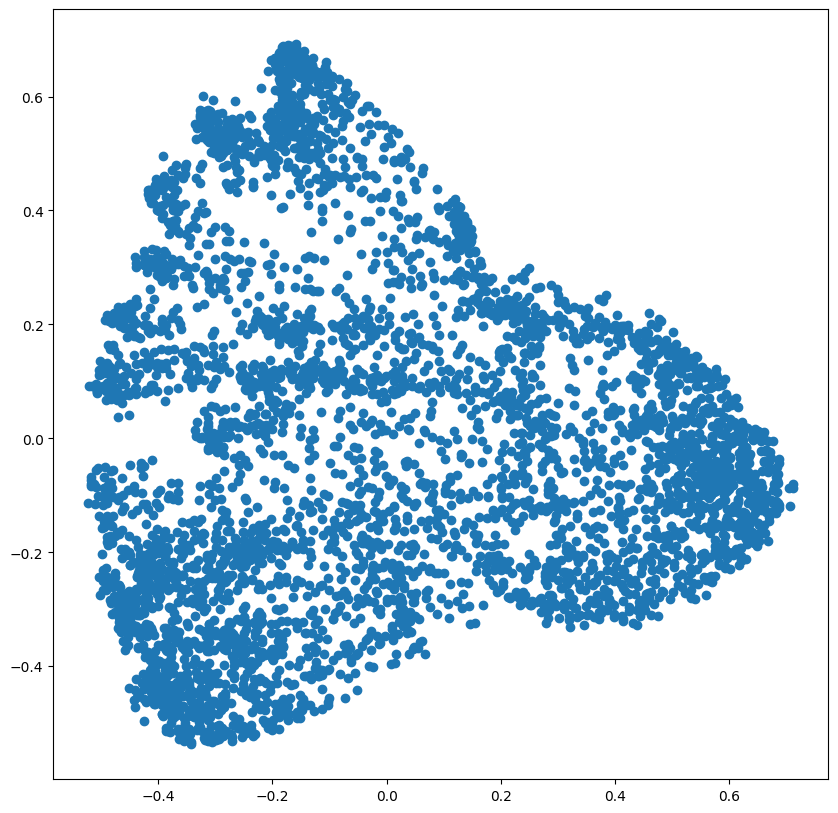

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1])

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

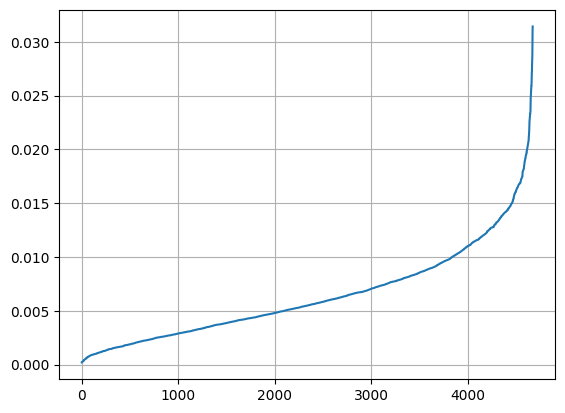

In [40]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure()
""" plt.xlim(4400,4671)
plt.ylim(0, 0.5) """
plt.grid(True)
plt.plot(distances)


In [98]:
# BELOW lines enables you to comment in and out clustering method you want to use note that GMM have different ouput and thus labels are extracted differently
#clusters = KMeans(n_clusters=7, random_state=0, n_init="auto")# check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#clusters.fit(x)
#clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
clusters = DBSCAN(eps=0.021, min_samples=6).fit(x) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#clusters = OPTICS(min_samples=8, max_eps=0.018, cluster_method='dbscan').fit(x) #OPTICS is not it
#clusters = SpectralClustering(n_clusters=3).fit(x)

if clusters is not None:
 cluster_labels = clusters.labels_

#cluster_labels = GaussianMixture(n_components=3).fit(x).predict(x) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py


print(cluster_labels, np.unique(cluster_labels), silhouette_score(x, cluster_labels), davies_bouldin_score(x,cluster_labels), calinski_harabasz_score(x, cluster_labels))

[ 0  0  0 ... 22 -1 -1] [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44] -0.117152421399331 2.125539301570974 679.9618699590019


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


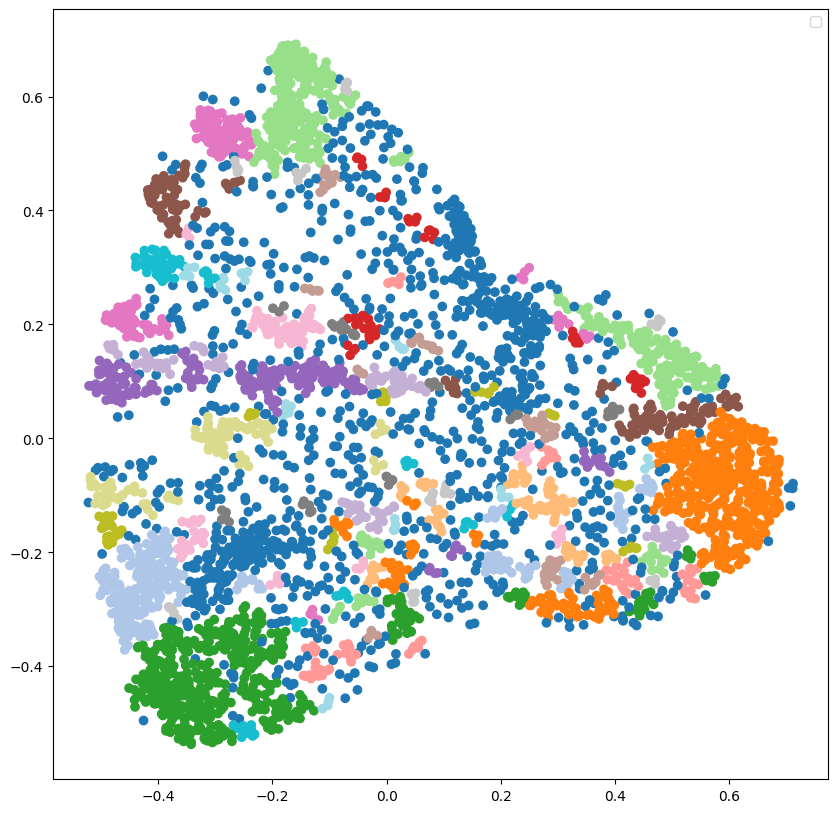

In [94]:
new_x = np.zeros([len(x), 3])
for i in range(0, len(x)):
    new_x[i] = (np.append(x[i], (cluster_labels[i])))

plt.figure(figsize=(10,10))
#plt.xlim(-2,2)
#plt.ylim(-2,2)
plt.set_cmap('tab20')
plt.scatter(new_x[:,0],new_x[:,1], c=new_x[:,2])
plt.legend()

In [136]:
# Creating lists to iterate 
n_clusters  = range(2,26)
min_samps   = range(2,26)
epsilons    = np.linspace(0.001, 0.02, 20) 
# Initialize lists to store scores
performance_res = []

n_clusters, min_samps, epsilons

(range(2, 26),
 range(2, 26),
 array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
        0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
        0.019, 0.02 ]))

In [137]:
for min_samp in min_samps:

    #clusters = SpectralClustering(n_clusters=numbo).fit(x)
    clusters = OPTICS(min_samples=min_samp, cluster_method='dbscan', max_eps=0.02).fit(x)

    if clusters is not None:
        cluster_labels = clusters.labels_

    #cluster_labels = GaussianMixture(n_components=numbo).fit(x).predict(x) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.htm


    SC_score = silhouette_score(x, cluster_labels)
    DB_score = davies_bouldin_score(x, cluster_labels)
    CH_score = calinski_harabasz_score(x, cluster_labels)

    # Append scores to the respective lists
    performance_res.append({
        'min_samples':          min_samp, 
        'sc':                   SC_score,
        'db':                   DB_score,
        'ch':                   CH_score

    })
"""     except ValueError:
        performance_res.append({
            #'epsilon':              epsilon,
            'min_samples':          min_samp, 
            'sc':                   None,
            'db':                   None,
            'ch':                   None

        }) """

"     except ValueError:\n        performance_res.append({\n            #'epsilon':              epsilon,\n            'min_samples':          min_samp, \n            'sc':                   None,\n            'db':                   None,\n            'ch':                   None\n\n        }) "

In [138]:
df_per = pd.DataFrame(performance_res)
performance_res
df_per.to_csv('optics_performance.csv')

In [139]:
df_per.sort_values(by=['sc'], ascending=False)

,min_samples,sc,db,ch
7,9,-0.074759,1.169322,377.271636
6,8,-0.091977,1.199154,451.148322
8,10,-0.095284,1.168324,315.029956
9,11,-0.119208,1.158745,261.228742
5,7,-0.143340,1.552601,539.313591
4,6,-0.162544,1.425772,596.099715
11,13,-0.171298,1.090643,242.875365
10,12,-0.181159,1.052292,243.230386
12,14,-0.186204,1.004030,248.206534
14,16,-0.243527,1.001560,202.639278


In [340]:
new_x

array([[ 0.19308962,  0.20796334,  2.        ],
       [ 0.20992511,  0.22804293,  2.        ],
       [ 0.13711238,  0.33803935,  1.        ],
       ...,
       [ 0.01147653,  0.00763776,  2.        ],
       [-0.0863173 , -0.01394072,  0.        ],
       [ 0.03984654,  0.01499081,  2.        ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


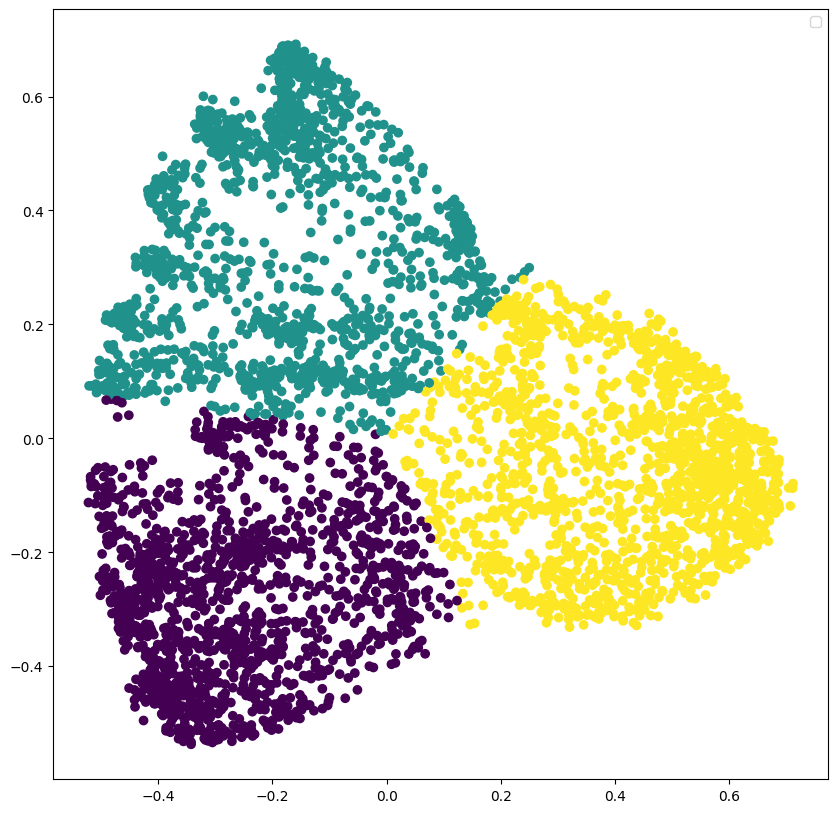

In [21]:
transformed_back_1 = principal.inverse_transform(x)

In [22]:
#transformed_back_2 = scaling.inverse_transform(transformed_back_1)

In [23]:
transformed_back_1

array([[ 0.41310868, -1.6068811 , -1.93331604, ..., -1.82469478,
         1.65805332, -0.00679452],
       [-0.12360723, -1.60602628, -1.98946791, ..., -1.64464007,
         1.53153692, -0.1983698 ],
       [-0.4422689 , -1.26624044, -1.60530817, ..., -1.18158507,
         1.12676388, -0.27953112],
       ...,
       [ 0.18166449, -0.59492314, -0.71271995, ..., -0.68515124,
         0.62059376,  0.00773918],
       [-0.01652487, -0.69753775, -0.86011548, ..., -0.7267131 ,
         0.67388731, -0.07288713],
       [ 0.21289834, -0.55215444, -0.65676205, ..., -0.65068144,
         0.58635211,  0.02299974]])

In [24]:
reversed_df = pd.DataFrame(transformed_back_1)

In [25]:
df_test['Cluster'] = cluster_labels

In [26]:
df_test

,arrival_delay,dwell_time,traffic_condition,recurrent_delay,origin_delay,previous_bus_delay,factor(day_of_week)weekday,factor(time_of_day)Off-peak,temp,Cluster
trip_id,,,,,,,,,,
1,340.000000,14.037037,65.234568,60.203704,100.0,188.296296,0.0,1.0,-0.5,3
2,149.222222,9.000000,69.061728,62.318519,17.0,340.000000,0.0,1.0,-0.5,3
3,86.111111,19.259259,69.691358,64.018519,10.0,149.222222,0.0,1.0,-0.5,3
4,27.037037,13.888889,67.049383,63.137566,12.0,85.518519,0.0,1.0,-0.5,3
5,221.296296,18.962963,63.617284,59.898148,3.0,-0.296296,0.0,1.0,-0.5,3
...,...,...,...,...,...,...,...,...,...,...
20185,112.555556,25.592593,72.938272,65.666099,17.0,185.074074,1.0,1.0,22.4,5
20186,151.851852,34.629630,72.407407,65.674356,20.0,107.296296,1.0,1.0,22.4,5
20187,179.592593,26.333333,67.456790,65.662792,21.0,151.851852,1.0,1.0,22.4,5


In [27]:
import random
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
color_ramp = get_colors(10)

In [28]:
color_ramp

['#eaedbe',
 '#257662',
 '#95b6fe',
 '#ce1c6c',
 '#2fb119',
 '#d2a85c',
 '#9f7ba5',
 '#4a2d6d',
 '#cfb921',
 '#683277']

In [29]:
def assign_color(row):
    return color_ramp[row]

In [30]:
df_test['color'] = df_test['Cluster'].map(assign_color)

In [31]:
df_test.dtypes

arrival_delay                  float64
dwell_time                     float64
traffic_condition              float64
recurrent_delay                float64
origin_delay                   float64
previous_bus_delay             float64
factor(day_of_week)weekday     float64
factor(time_of_day)Off-peak    float64
temp                           float64
Cluster                          int32
color                           object
dtype: object

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: xlabel='factor(day_of_week)weekday', ylabel='arrival_delay'>

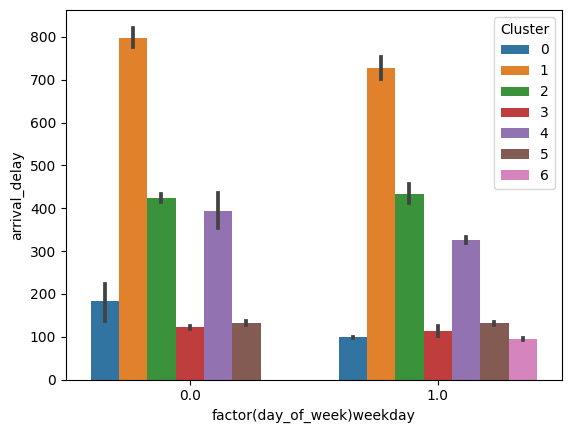

In [34]:
import seaborn as sns
sns.barplot(data=df_test ,x='factor(day_of_week)weekday', y='arrival_delay', hue='Cluster')

<Axes: xlabel='factor(day_of_week)weekday', ylabel='count'>

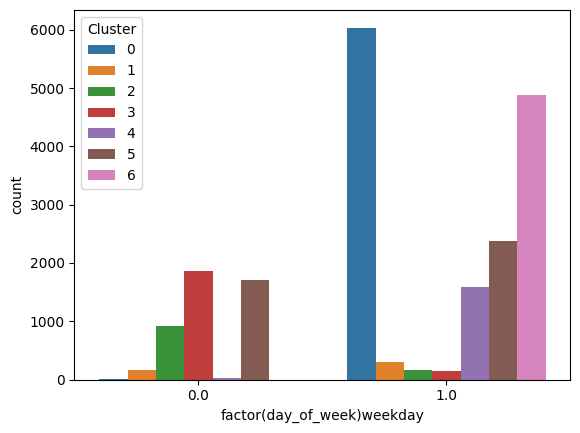

In [35]:
sns.countplot(data=df_test, x='factor(day_of_week)weekday', hue='Cluster')

<Axes: xlabel='factor(time_of_day)Off-peak', ylabel='arrival_delay'>

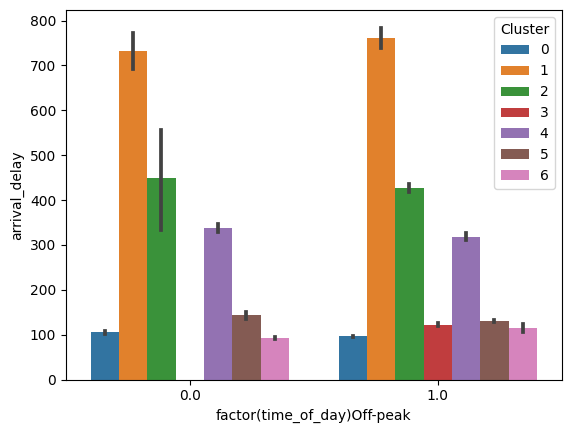

In [36]:
sns.barplot(data=df_test ,x='factor(time_of_day)Off-peak', y='arrival_delay', hue='Cluster')

<Axes: xlabel='factor(time_of_day)Off-peak', ylabel='count'>

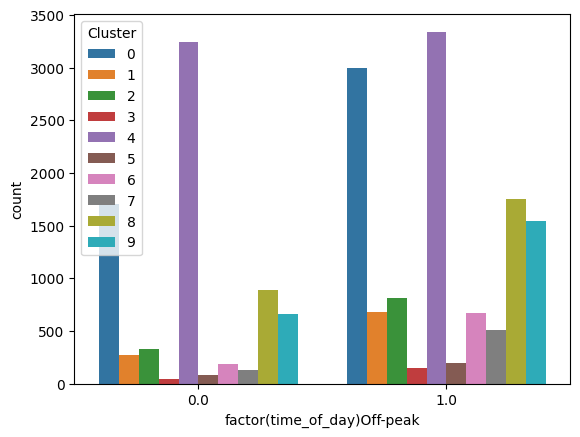

In [ ]:
sns.countplot(data=df_test, x='factor(time_of_day)Off-peak', hue='Cluster')